<a href="https://colab.research.google.com/github/Enayar478/ML-Notebooks/blob/main/Customers_clustering_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 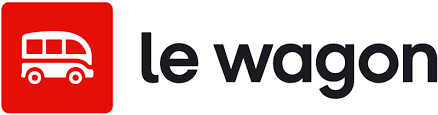

# Orders clustering

The purpose of the exercise is to extract different "typical profiles" of orders and consumers from Greenweez's turnover data. To achieve this, we will apply unsupervised learning algorithms to create order clusters.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Orders clustering

a) Execute the cell below to load  the data into a `df` variable.

It will select 50k orders randomly (`ORDER BY rand()` in the SQL query).

In [ ]:
from google.colab import auth
import pandas as pd

# get credentials
auth.authenticate_user()

query = '''
SELECT turnover_grocery, turnover_beauty, turnover_baby, turnover_home, turnover_fresh, promo_rate
FROM `data-analytics-bootcamp-363212.course33.gwz_orders_segmentation`
ORDER BY rand()
LIMIT 50000
'''
df = pd.read_gbq(query, project_id="data-analytics-bootcamp-363212")
df.head()

turnover_grocery  turnover_beauty  turnover_baby  turnover_home  \
0              0.00             0.00           0.00          28.30   
1              0.00            18.59           0.00           0.00   
2             92.78            26.79           0.00          12.15   
3              0.00             0.00          67.47           0.00   
4             49.41            69.66           0.00           0.00   

   turnover_fresh  promo_rate  
0             0.0         NaN  
1             0.0         NaN  
2             0.0         NaN  
3             0.0    0.136505  
4             0.0    0.025657

b) Which features do you see?

In [ ]:
df.describe()

turnover_grocery  turnover_beauty  turnover_baby  turnover_home  \
count      50000.000000     50000.000000   50000.000000   50000.000000   
mean          26.652051        18.164043      18.994479      11.664220   
std           41.295694        26.686492      39.113825      38.244236   
min            0.000000         0.000000       0.000000       0.000000   
25%            0.000000         0.000000       0.000000       0.000000   
50%            6.270000         8.390000       0.000000       0.000000   
75%           41.790000        28.210000      20.877500      14.310000   
max         1075.700000      1181.600000    1065.090000    5661.980000   

       turnover_fresh    promo_rate  
count    50000.000000  33889.000000  
mean         0.005635      0.067689  
std          0.236016      0.069174  
min          0.000000      0.000000  
25%          0.000000      0.020258  
50%          0.000000      0.043591  
75%          0.000000      0.090151  
max         26.800000      0.600000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   turnover_grocery  50000 non-null  float64
 1   turnover_beauty   50000 non-null  float64
 2   turnover_baby     50000 non-null  float64
 3   turnover_home     50000 non-null  float64
 4   turnover_fresh    50000 non-null  float64
 5   promo_rate        33889 non-null  float64
dtypes: float64(6)
memory usage: 2.3 MB


Are there any null values?

In [ ]:
missing_values = df.isna().sum()
print("Valeurs manquantes :", missing_values)

Valeurs manquantes : turnover_grocery        0
turnover_beauty         0
turnover_baby           0
turnover_home           0
turnover_fresh          0
promo_rate          16111
dtype: int64


In [ ]:
values_null = df.isnull().sum()
print("Valeurs manquantes :", values_null)

Valeurs manquantes : turnover_grocery        0
turnover_beauty         0
turnover_baby           0
turnover_home           0
turnover_fresh          0
promo_rate          16111
dtype: int64


c) Replace null values (if any exist) with 0 using `fillna()`

In [ ]:
df['promo_rate'] = df['promo_rate'].fillna(0)

In [ ]:
df.isnull().sum()
print("Valeurs manquantes :", df.isnull().sum())

Valeurs manquantes : turnover_grocery    0
turnover_beauty     0
turnover_baby       0
turnover_home       0
turnover_fresh      0
promo_rate          0
dtype: int64


d) In a variable called `df_orders`, keep all the turnover columns from the original df. These features will help us cluster orders.


In [ ]:
df_orders = df.drop(columns=['promo_rate'])
df_orders.head()

turnover_grocery  turnover_beauty  turnover_baby  turnover_home  \
0              0.00             0.00           0.00          28.30   
1              0.00            18.59           0.00           0.00   
2             92.78            26.79           0.00          12.15   
3              0.00             0.00          67.47           0.00   
4             49.41            69.66           0.00           0.00   

   turnover_fresh  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

e) Use plotly.express and a box chart to see if the distribution of turnover is different per category (i.e. feature).

In [ ]:
import plotly.express as px

fig = px.box(df_orders)
fig.show()

In [ ]:
fig = px.scatter(df_orders)
fig.show()

f) Most entries for the column 'turnover_fresh' do not differ from zero, it seems like people are not purchasing these products enough to conduct a meaningful analysis.

Delete the `turnover_fresh` column from `df_orders`.

In [ ]:
df_orders = df_orders.drop(columns=['turnover_fresh'])

In [ ]:
df_orders.head()

turnover_grocery  turnover_beauty  turnover_baby  turnover_home
0              0.00             0.00           0.00          28.30
1              0.00            18.59           0.00           0.00
2             92.78            26.79           0.00          12.15
3              0.00             0.00          67.47           0.00
4             49.41            69.66           0.00           0.00

g) Train a first kmeans algorithm with two a-priori clusters. Remember that distance based models, such as k-means, are greatly effected by scale. Be sure to standardize your data appropriately.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
df_orders_scaled = scaler.fit_transform(df_orders)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
X = df_orders_scaled

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
print(X)

[[-0.64540185 -0.68065241 -0.48562544  0.43499225]
 [-0.64540185  0.01596167 -0.48562544 -0.30499594]
 [ 1.60134396  0.32323631 -0.48562544  0.01270217]
 ...
 [-0.64540185 -0.28007121 -0.48562544 -0.30499594]
 [-0.38411291 -0.68065241  0.99212769 -0.30499594]
 [-0.64540185 -0.31454592 -0.48562544 -0.30499594]]


h) What is inertia for a clustering algorithm? What is inertia for this model?

In [ ]:
kmeans.cluster_centers_

array([[ 0.12226212,  0.10999611, -0.40094064,  0.05162099],
       [-0.50873562, -0.45769647,  1.66832361, -0.21479617]])

In [ ]:
kmeans.inertia_

160373.3144554846

i) How do we know if 2 clusters a priori was a good choice or not?
Which method could you use?

The elbow method will allow of to check inertias with differing numbers of starting clusters.

j) You will use elbow method.

You will need to loop over different values of  𝑘  (in range 1 to 10) and stores the inertia at each iteration in order to plot its evolution and select the best  𝑘.

Complete code below to do so.

In [ ]:
inertias = []
n_k = range(1, 15)

# for each number of centroids
for k in n_k:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

inertias

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

[199999.99999999948,
 160373.32280892113,
 129235.02136419283,
 106929.32077251287,
 85155.13300685471,
 73569.78549081327,
 65440.62829297242,
 58490.084492560614,
 51652.27696040286,
 46364.45012785159,
 43160.83041853171,
 38885.47562743062,
 36206.86881544259,
 33522.12298875147]

k) Use plotly.express to display a line chart of all inertias.

Which number of cluster you recommend and why?

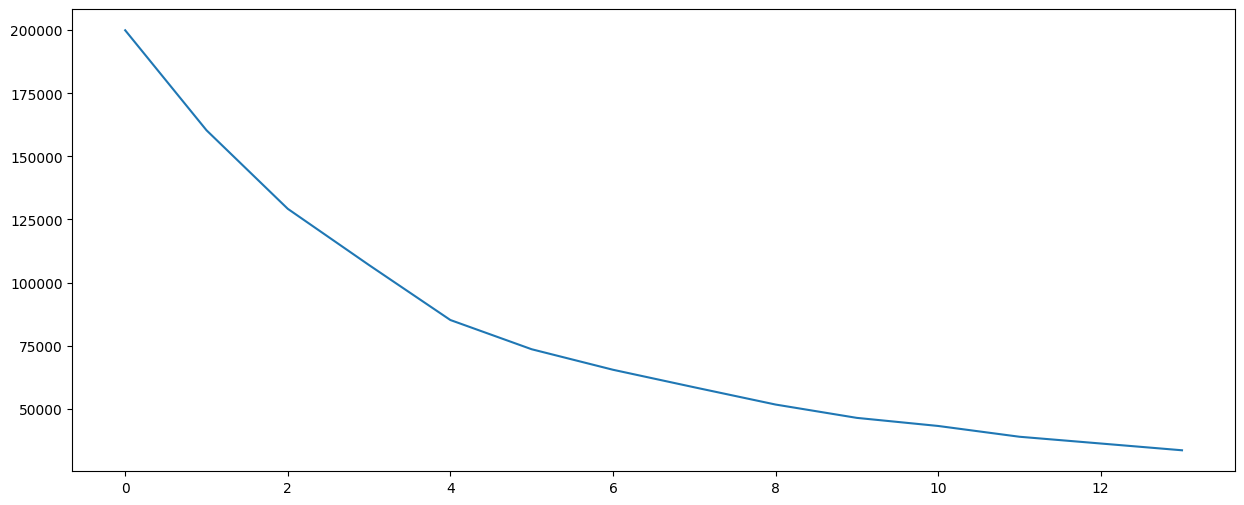

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(inertias)
plt.show()

<details>
    <summary><i>Solution</i></summary>

It seems like the largest decreases in inertia occur from 1 -> 2 centroids and then 2 -> 3 centroids. Accordingly, choosing 3 centroids seems like a sensible place to start.
</details>

l) Train a new model with 3 clusters a priori. Use parameter n_init=100 to select best model among 100 tries.

Use `predict()` method to predict in which cluster each row of `df_orders` belong to. We will store results in a `labels` variable.

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
kmeans.labels_

array([1, 1, 2, ..., 1, 0, 1], dtype=int32)

In [ ]:
kmeans_pred

array([1, 1, 2, ..., 1, 0, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[-0.51397312, -0.47376831,  1.70938684, -0.22054862],
       [-0.40981218,  0.29567015, -0.37869701,  0.13970565],
       [ 1.37841121, -0.34035871, -0.41801374, -0.1633843 ]])

In [ ]:
kmeans.inertia_

129234.02997304704

m) Use [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) function of seaborn library to count visualize number of samples per cluster. It is well distributed?

<Axes: ylabel='count'>

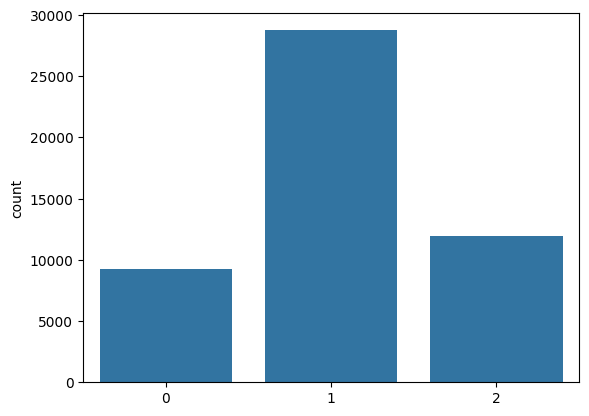

In [ ]:
sns.countplot(x = kmeans.labels_)

One bigger cluster... but overall, orders are well distributed.

n) Each KMeans cluster has a center (centroid).

You can get the values of the center for each cluster using the `.cluster_centers_` attribute on your KMeans object.

Create a DataFrame with each cluster's centroid values and the names of the features that the model has been trained on.

In [ ]:
df_KM = pd.DataFrame(kmeans.cluster_centers_, columns=df_orders.columns)
df_KM.head()

turnover_grocery  turnover_beauty  turnover_baby  turnover_home
0         -0.513973        -0.473768       1.709387      -0.220549
1         -0.409812         0.295670      -0.378697       0.139706
2          1.378411        -0.340359      -0.418014      -0.163384

o) What conclusions can you draw? What are the different order profiles that emerge?

<details>
    <summary><i>Solution</i></summary>

Remember that the values in each column are the relative coordinates for each centroid across the features. The greater the magnitude of a feature for a cluster, the more important that feature is to that cluster.

In the example above we can see 3 types of orders : 1 with mostly groceries, 1 with baby products and 1 that is more evenly distributed mainly mixing beauty and home products.
</details>

p) Add to `df` a new column label containing labels of each sample.

In [ ]:
df_orders['label'] = kmeans.labels_

print(df_orders.head())

   turnover_grocery  turnover_beauty  turnover_baby  turnover_home  label
0              0.00             0.00           0.00          28.30      1
1              0.00            18.59           0.00           0.00      1
2             92.78            26.79           0.00          12.15      2
3              0.00             0.00          67.47           0.00      0
4             49.41            69.66           0.00           0.00      1


q) What does this instruction do? What can you say?

In [ ]:
df_orders[df["promo_rate"] > 0].groupby("label").size() / df_orders.groupby("label").size()

label
0    0.648955
1    0.647284
2    0.773145
dtype: float64

Where the promotion rate is greater than zero, we can see that the cluster we have associated with greater grocery turnover uses promotion codes more than others.